<a href="https://colab.research.google.com/github/diajengca/rock-paper-scissors-classification/blob/main/image_classification_rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama lengkap: Diajeng Ciptaning Ayu

Email: diajengciptaningayu@gmail.com

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-01 14:59:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.11MB/s    in 42s     

2020-11-01 14:59:45 (7.26 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors/'
classes_dir = ['rock', 'paper', 'scissors']
for cls in classes_dir:
    os.makedirs(base_dir +'train/' + cls)
    os.makedirs(base_dir +'val/' + cls)

In [ ]:
import glob
rock_files = glob.glob('/tmp/rockpaperscissors/rock/*')
paper_files = glob.glob('/tmp/rockpaperscissors/paper/*')
scissors_files = glob.glob('/tmp/rockpaperscissors/scissors/*')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

rock_train, rock_val = train_test_split(rock_files, test_size=0.4)
paper_train, paper_val = train_test_split(paper_files, test_size=0.4)
scissors_train, scissors_val = train_test_split(scissors_files, test_size=0.4)

In [ ]:
import shutil

for name in rock_train:
    shutil.copy(name, '/tmp/rockpaperscissors/train/rock')
for name in rock_val:
    shutil.copy(name, '/tmp/rockpaperscissors/val/rock')
for name in paper_train:
    shutil.copy(name, '/tmp/rockpaperscissors/train/paper')
for name in paper_val:
    shutil.copy(name, '/tmp/rockpaperscissors/val/paper')
for name in scissors_train:
    shutil.copy(name, '/tmp/rockpaperscissors/train/scissors')
for name in scissors_val:
    shutil.copy(name, '/tmp/rockpaperscissors/val/scissors')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/train',
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/val',
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
import tensorflow.keras as keras

model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), input_shape=(150,150,3), padding='same', activation="relu"))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten()) # flatten layer 
model.add(keras.layers.Dense(units = 128,activation='relu') )  #input layer 
model.add(keras.layers.Dense(units = 64, activation='relu') )  # hidden layer 
model.add(keras.layers.Dense(units = 32, activation='relu') )  # hidden layer 
model.add(keras.layers.Dense(units = 3, activation='softmax') ) # output layer 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 14s - loss: 2.0632 - accuracy: 0.3100 - val_loss: 1.0914 - val_accuracy: 0.5500
Epoch 2/20
25/25 - 13s - loss: 1.1062 - accuracy: 0.3700 - val_loss: 1.0691 - val_accuracy: 0.3500
Epoch 3/20
25/25 - 13s - loss: 1.0348 - accuracy: 0.5100 - val_loss: 1.2275 - val_accuracy: 0.4500
Epoch 4/20
25/25 - 13s - loss: 0.8767 - accuracy: 0.6400 - val_loss: 1.1970 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 14s - loss: 1.0454 - accuracy: 0.5200 - val_loss: 0.9093 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 13s - loss: 0.7861 - accuracy: 0.6800 - val_loss: 0.6762 - val_accuracy: 0.7000
Epoch 7/20
25/25 - 13s - loss: 0.7390 - accuracy: 0.7200 - val_loss: 0.4255 - val_accuracy: 0.9000
Epoch 8/20
25/25 - 13s - loss: 0.7074 - accuracy: 0.6700 - val_loss: 0.5932 - val_accuracy: 0.6500
Epoch 9/20
25/25 - 13s - loss: 0.9564 - accuracy: 0.6000 - val_loss: 0.8497 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 13s - loss: 0.7501 - accuracy: 0.7000 - val_loss: 0.8069 - val_accuracy: 0.6000
Epoch 11/

Saving 1MMkSW3f1CAsw03q.png to 1MMkSW3f1CAsw03q.png
1MMkSW3f1CAsw03q.png
[[0. 0. 1.]]
scissors


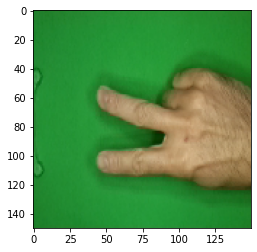

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    prediction = np.where(classes[0] == 1)[0][0]
  
    print(fn)
    print(classes)
    if (prediction == 0):
        print('paper')
    elif (prediction == 1):
        print('rock')
    elif (prediction == 2):
        print('scissors')